In [53]:
import numpy as np
import pandas as pd
import matplotlib 

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
plt.style.use('ggplot')

In [55]:
from matplotlib.pyplot import figure 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
#adjust the configuration of the plot that we will create

In [80]:
# Reading the data :
movies = pd.read_csv("C:/Users/16475/OneDrive - Humber College/Desktop/movies.csv")
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [57]:
movies.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [59]:
# Analyzing missing data

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [60]:
movies.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [61]:
missing_percentages = movies.isnull().mean() * 100
missing_percentages

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [62]:
# Filling the missing values of budget column with machine learning technique
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
movies['budget'] = imputer.fit_transform(movies[['budget']])

In [12]:
movies.to_excel('output.xlsx', sheet_name='Sheet1', index=False)

In [63]:
# Droping the rest of the null values

movies.dropna(inplace=True)


In [64]:
#Column DATA Types

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [65]:
# change data types of columns
movies['budget']= movies['budget'].astype('int64')
movies['gross']= movies['gross'].astype('int64')

In [66]:
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [81]:
movies.sort_values(by=['gross'] , inplace = False , ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [18]:
# How to see all the rows
pd.set_option('display.max_rows' , None)

In [19]:
## Drop duplicates
movies['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [82]:
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [83]:
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [29]:
# Finding Correlations


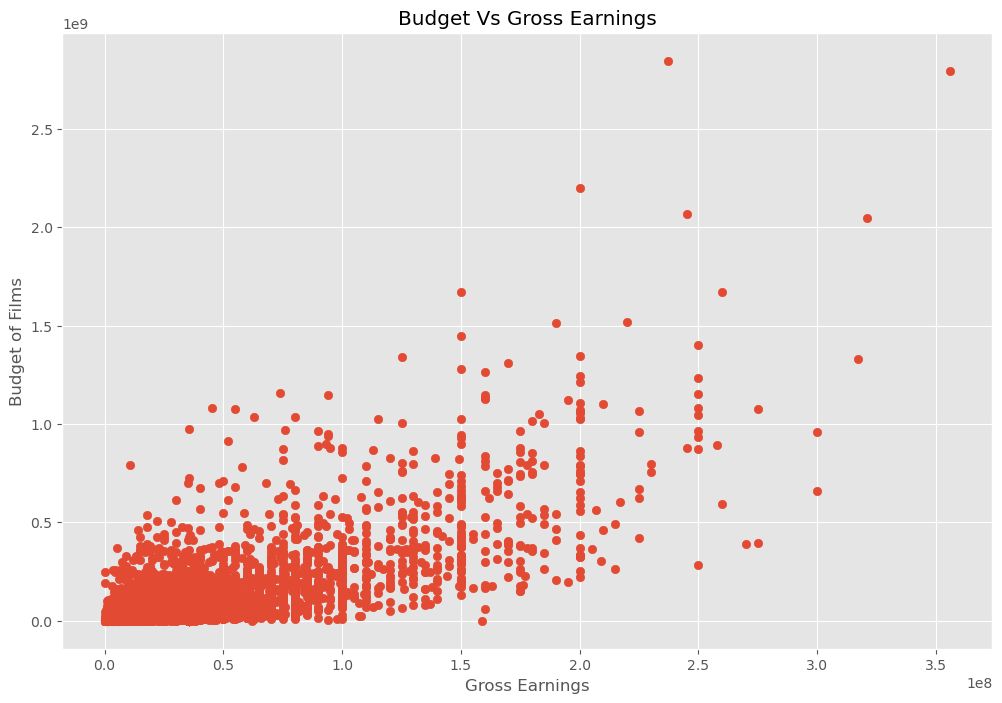

In [33]:
#Scatterplot : Budget VS Gross Rev
plt.scatter(x = movies['budget'] , y = movies['gross'])
plt.title("Budget Vs Gross Earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Films')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

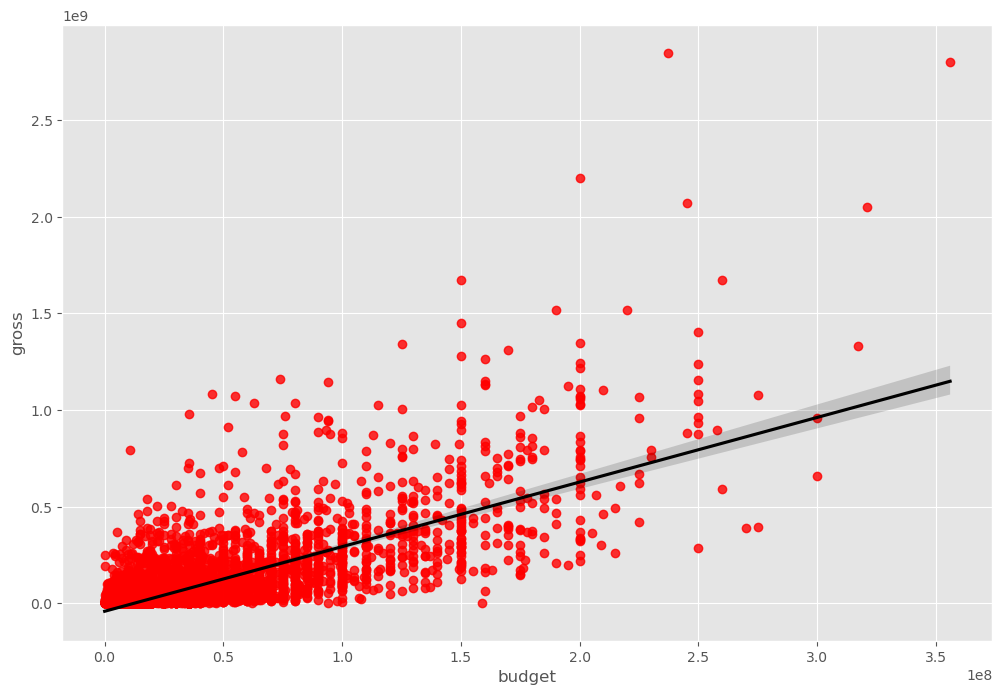

In [36]:
# Plot budget vs gross using seaborn
sns.regplot(x = 'budget' ,  y = 'gross' , data = movies , scatter_kws = {"color" :  "red"}, line_kws={"color" : "black"})
# the line is going in upward direction and shows positive correlation

In [40]:
movies.corr(method= "pearson")


#this correlation will work only on numerical fields 
#We are using Pearson coefficient as its the default

year     score     votes    budget     gross   runtime
year     1.000000  0.065343  0.326025  0.148494  0.203384  0.090236
score    0.065343  1.000000  0.304754 -0.000444  0.088522  0.282388
votes    0.326025  0.304754  1.000000  0.171078  0.549336  0.191732
budget   0.148494 -0.000444  0.171078  1.000000  0.265429  0.164468
gross    0.203384  0.088522  0.549336  0.265429  1.000000  0.169083
runtime  0.090236  0.282388  0.191732  0.164468  0.169083  1.000000

In [ ]:
#High Correlation between budget and gross has been observed 

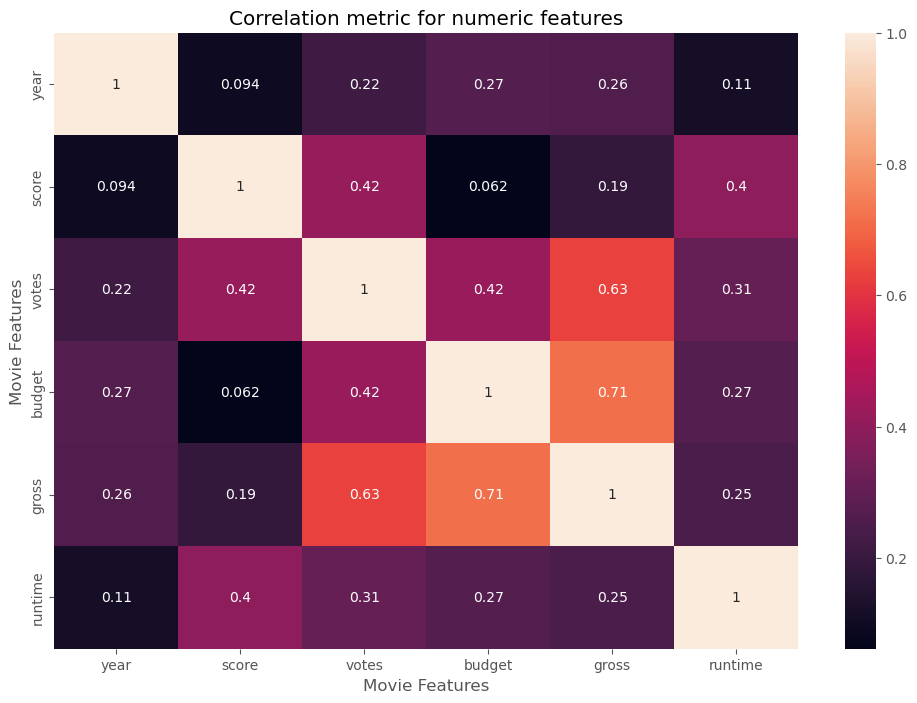

In [43]:
correlation_matrix = movies.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation metric for numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
# Looks at Company
# Numerizing Companies

In [85]:
movies_numerized = movies

for col_name in movies_numerized.columns :
    if (movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes
movies_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55   4500000.0   58853106.0      731    104.0  
2  1745       55  18000000.0  538375067.0     1540    124.0  
3  2246       55   3500000.0   83453539.0     1812     88.0  
4   410       55   6000000.0   39846344.0     1777     98.0

In [84]:
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

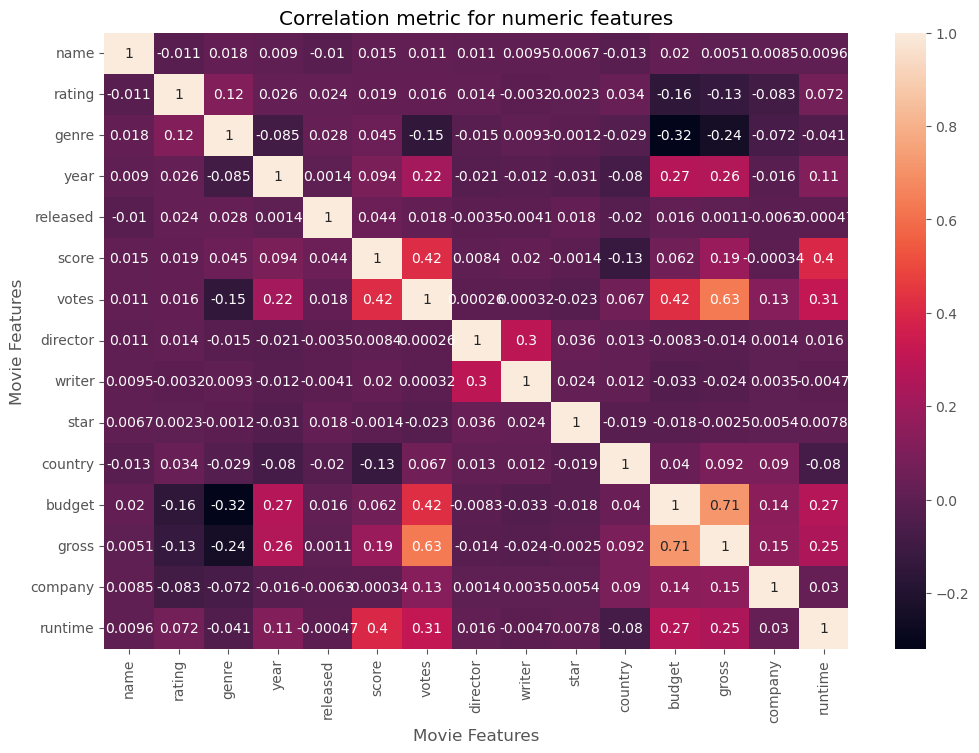

In [72]:
correlation_matrix = movies_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation metric for numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [73]:
movies_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.010815  0.018363  0.008987 -0.010012  0.014970   
rating   -0.010815  1.000000  0.118600  0.025950  0.024188  0.018596   
genre     0.018363  0.118600  1.000000 -0.084892  0.027639  0.045478   
year      0.008987  0.025950 -0.084892  1.000000  0.001440  0.093951   
released -0.010012  0.024188  0.027639  0.001440  1.000000  0.044469   
score     0.014970  0.018596  0.045478  0.093951  0.044469  1.000000   
votes     0.011462  0.016485 -0.148120  0.218941  0.018211  0.415190   
director  0.010575  0.013653 -0.015227 -0.021394 -0.003460  0.008358   
writer    0.009451 -0.003234  0.009340 -0.011853 -0.004121  0.019710   
star      0.006731  0.002255 -0.001158 -0.031476  0.017597 -0.001386   
country  -0.012544  0.033607 -0.029208 -0.080122 -0.020491 -0.126497   
budget    0.020022 -0.158226 -0.319104  0.268662  0.015625  0.061506   
gross     0.005135 -0.131786 -0.242597  0.258826  0.001084  0.188071   
company   0.008529 -0.083083 -0.071590 -0.015880 -0.006299 -0.000342   
runtime   0.009563  0.072340 -0.040939  0.114237 -0.000472  0.397226   

             votes  director    writer      star   country    budget  \
name      0.011462  0.010575  0.009451  0.006731 -0.012544  0.020022   
rating    0.016485  0.013653 -0.003234  0.002255  0.033607 -0.158226   
genre    -0.148120 -0.015227  0.009340 -0.001158 -0.029208 -0.319104   
year      0.218941 -0.021394 -0.011853 -0.031476 -0.080122  0.268662   
released  0.018211 -0.003460 -0.004121  0.017597 -0.020491  0.015625   
score     0.415190  0.008358  0.019710 -0.001386 -0.126497  0.061506   
votes     1.000000  0.000260  0.000323 -0.022542  0.066907  0.420611   
director  0.000260  1.000000  0.297126  0.036188  0.012726 -0.008284   
writer    0.000323  0.297126  1.000000  0.024161  0.012415 -0.033373   
star     -0.022542  0.036188  0.024161  1.000000 -0.018838 -0.017772   
country   0.066907  0.012726  0.012415 -0.018838  1.000000  0.040324   
budget    0.420611 -0.008284 -0.033373 -0.017772  0.040324  1.000000   
gross     0.631110 -0.014296 -0.024021 -0.002451  0.091951  0.714607   
company   0.128127  0.001379  0.003462  0.005417  0.089754  0.144052   
runtime   0.309945  0.015713 -0.004668  0.007827 -0.079525  0.266956   

             gross   company   runtime  
name      0.005135  0.008529  0.009563  
rating   -0.131786 -0.083083  0.072340  
genre    -0.242597 -0.071590 -0.040939  
year      0.258826 -0.015880  0.114237  
released  0.001084 -0.006299 -0.000472  
score     0.188071 -0.000342  0.397226  
votes     0.631110  0.128127  0.309945  
director -0.014296  0.001379  0.015713  
writer   -0.024021  0.003462 -0.004668  
star     -0.002451  0.005417  0.007827  
country   0.091951  0.089754 -0.079525  
budget    0.714607  0.144052  0.266956  
gross     1.000000  0.153980  0.245117  
company   0.153980  1.000000  0.030234  
runtime   0.245117  0.030234  1.000000

In [74]:
correlation_mat = movies_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.010815
          genre       0.018363
          year        0.008987
          released   -0.010012
          score       0.014970
          votes       0.011462
          director    0.010575
          writer      0.009451
          star        0.006731
          country    -0.012544
          budget      0.020022
          gross       0.005135
          company     0.008529
          runtime     0.009563
rating    name       -0.010815
          rating      1.000000
          genre       0.118600
          year        0.025950
          released    0.024188
          score       0.018596
          votes       0.016485
          director    0.013653
          writer     -0.003234
          star        0.002255
          country     0.033607
          budget     -0.158226
          gross      -0.131786
          company    -0.083083
          runtime     0.072340
genre     name        0.018363
          rating      0.118600
        

In [77]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.319104
genre     budget     -0.319104
          gross      -0.242597
gross     genre      -0.242597
budget    rating     -0.158226
rating    budget     -0.158226
genre     votes      -0.148120
votes     genre      -0.148120
gross     rating     -0.131786
rating    gross      -0.131786
country   score      -0.126497
score     country    -0.126497
genre     year       -0.084892
year      genre      -0.084892
company   rating     -0.083083
rating    company    -0.083083
country   year       -0.080122
year      country    -0.080122
runtime   country    -0.079525
country   runtime    -0.079525
genre     company    -0.071590
company   genre      -0.071590
runtime   genre      -0.040939
genre     runtime    -0.040939
writer    budget     -0.033373
budget    writer     -0.033373
year      star       -0.031476
star      year       -0.031476
genre     country    -0.029208
country   genre      -0.029208
gross     writer     -0.024021
writer    gross      -0.024021
votes   

In [79]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.631110
votes     gross       0.631110
budget    gross       0.714607
gross     budget      0.714607
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest corr to gross earnings
# company has low correlation